# Connect to drive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Install necessary packages

In [ ]:
!pip install tensorflow scikit-learn matplotlib

# Importing Libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_dir = '/content/gdrive/MyDrive/ISIC_Labelled -4GB'

# Load Images For Training & Testing

In [ ]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.2,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.2,
                               ).flow_from_directory(directory=data_dir,
                                                     target_size=(256, 256),
                                                     subset='validation',
                                                    ),
}

Found 6837 images belonging to 8 classes.
Found 1704 images belonging to 8 classes.


# Initialize ResNet50 Pretrained Model

In [ ]:
# Initializing resnet50 (pretrained) model with input image shape as (256, 256, 3)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3), classes=8)


# Setting the Training of all layers of resnet50 model to false
base_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


# Add Custom Layer

In [ ]:
# Adding some more layers at the end of the Model as per our requirement
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(8, activation='softmax') # 8 Output Neurons for 8 Classes
])

In [ ]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

# View Model Summary & Plot

In [ ]:
# Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 25694088 (98.02 MB)
Trainable params: 2106376 (8.04 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

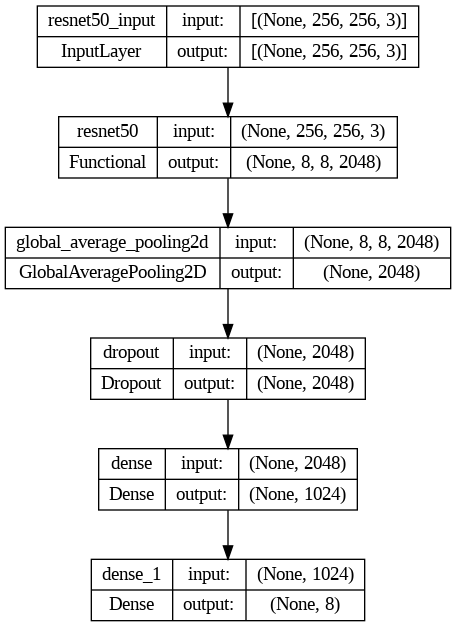

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Model Building

In [ ]:
# Setting variables for the model
batch_size = 32
epochs = 30

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 213
validation_steps : 53


# Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples/valid_generator.batch_size,
    verbose=1
)

Epoch 1/30
213/213 [==============================] - 4270s 20s/step - loss: 1.8455 - accuracy: 0.2553 - val_loss: 1.7870 - val_accuracy: 0.2917
Epoch 2/30
213/213 [==============================] - 2242s 11s/step - loss: 1.8136 - accuracy: 0.2795 - val_loss: 1.7893 - val_accuracy: 0.2940
Epoch 3/30
213/213 [==============================] - 2247s 11s/step - loss: 1.7984 - accuracy: 0.2935 - val_loss: 1.7784 - val_accuracy: 0.3216
Epoch 4/30
213/213 [==============================] - 2250s 11s/step - loss: 1.7890 - accuracy: 0.2982 - val_loss: 1.7762 - val_accuracy: 0.3063
Epoch 5/30
213/213 [==============================] - 2197s 10s/step - loss: 1.7849 - accuracy: 0.2940 - val_loss: 1.7786 - val_accuracy: 0.2993
Epoch 6/30
213/213 [==============================] - 2224s 10s/step - loss: 1.7796 - accuracy: 0.3064 - val_loss: 1.8160 - val_accuracy: 0.2136
Epoch 7/30
213/213 [==============================] - 2196s 10s/step - loss: 1.7802 - accuracy: 0.3060 - val_loss: 1.7638 - val_ac